In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
from rolling_sharpe import rolling_sharpe

nvda = yf.Ticker('NVDA')
nvda_close = nvda.history(period='5y')['Close']
nvda_close

Date
2018-02-12 00:00:00-05:00     56.432339
2018-02-13 00:00:00-05:00     57.570724
2018-02-14 00:00:00-05:00     59.746056
2018-02-15 00:00:00-05:00     61.003231
2018-02-16 00:00:00-05:00     60.344940
                                ...    
2023-02-06 00:00:00-05:00    210.889999
2023-02-07 00:00:00-05:00    221.729996
2023-02-08 00:00:00-05:00    222.050003
2023-02-09 00:00:00-05:00    223.369995
2023-02-10 00:00:00-05:00    212.649994
Name: Close, Length: 1259, dtype: float64

In [20]:
nvda_returns = nvda_close.pct_change().dropna()
nvda_returns

Date
2018-02-13 00:00:00-05:00    0.020173
2018-02-14 00:00:00-05:00    0.037785
2018-02-15 00:00:00-05:00    0.021042
2018-02-16 00:00:00-05:00   -0.010791
2018-02-20 00:00:00-05:00    0.021490
                               ...   
2023-02-06 00:00:00-05:00   -0.000521
2023-02-07 00:00:00-05:00    0.051401
2023-02-08 00:00:00-05:00    0.001443
2023-02-09 00:00:00-05:00    0.005945
2023-02-10 00:00:00-05:00   -0.047992
Name: Close, Length: 1258, dtype: float64

In [21]:
irx = yf.Ticker('^IRX')
thirteen_wk_yield = irx.history(period='5y')['Close'][1:] * 0.01
thirteen_wk_yield

Date
2018-02-13 00:00:00-05:00    0.01570
2018-02-14 00:00:00-05:00    0.01550
2018-02-15 00:00:00-05:00    0.01560
2018-02-16 00:00:00-05:00    0.01570
2018-02-20 00:00:00-05:00    0.01573
                              ...   
2023-02-06 00:00:00-05:00    0.04533
2023-02-07 00:00:00-05:00    0.04570
2023-02-08 00:00:00-05:00    0.04585
2023-02-09 00:00:00-05:00    0.04613
2023-02-10 00:00:00-05:00    0.04635
Name: Close, Length: 1258, dtype: float64

In [22]:
nvda_rs = rolling_sharpe(daily_returns=nvda_returns, risk_free_rate=thirteen_wk_yield, window=6)
nvda_rs

Date
2018-08-13 00:00:00-04:00    0.527656
2018-08-14 00:00:00-04:00    0.528310
2018-08-15 00:00:00-04:00    0.336539
2018-08-16 00:00:00-04:00    0.221446
2018-08-17 00:00:00-04:00    0.058462
                               ...   
2023-02-06 00:00:00-05:00    0.352755
2023-02-07 00:00:00-05:00    0.620626
2023-02-08 00:00:00-05:00    0.719952
2023-02-09 00:00:00-05:00    0.599763
2023-02-10 00:00:00-05:00    0.502521
Name: Close, Length: 1133, dtype: float64

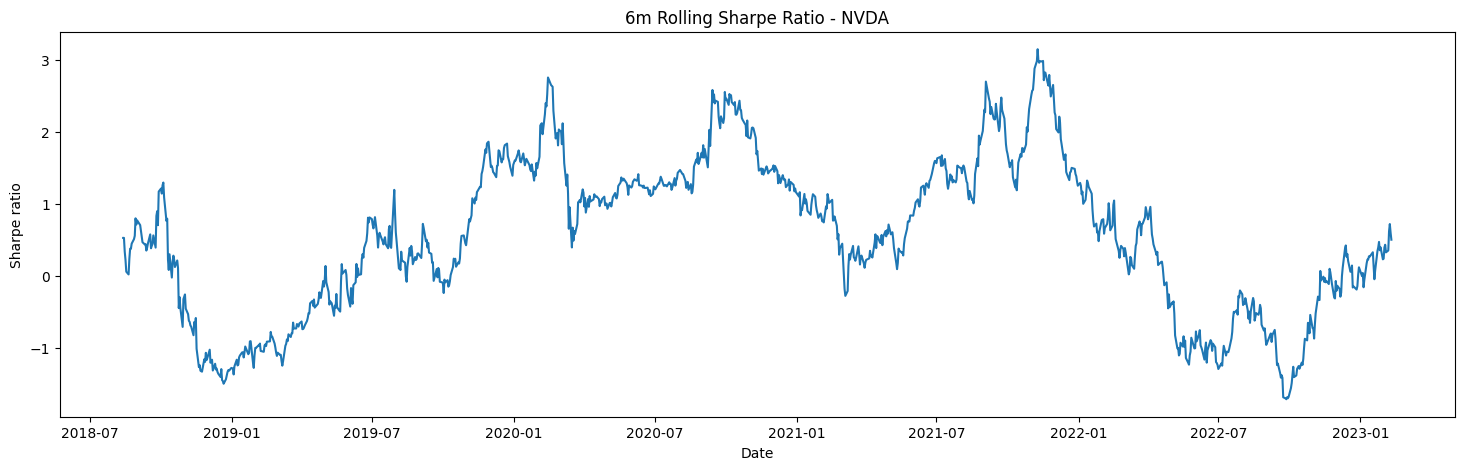

In [23]:
plt.figure(figsize=(18, 5))
plt.title("6m Rolling Sharpe Ratio - NVDA")
plt.xlabel("Date")
plt.ylabel("Sharpe ratio")
plt.plot(nvda_rs)